In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
books = pd.read_csv('./BX-Books.csv', encoding='utf_8', sep=';', on_bad_lines='skip', low_memory=False, encoding_errors='replace')
ratings = pd.read_csv('./BX-Book-Ratings.csv', encoding='utf_8', sep=';', on_bad_lines='skip', low_memory=False, encoding_errors='replace')
users = pd.read_csv('./BX-Users.csv', encoding='utf_8', sep=';', on_bad_lines='skip', low_memory=False, encoding_errors='replace')

# Books

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
books['ISBN'].nunique()

271360

In [6]:
books['Book-Title'].nunique() # books with the same name

242135

In [7]:
books['Book-Author'].nunique()

102023

In [8]:
books[books['Book-Title'].apply(lambda x: not x.isascii() or not x.isprintable())] # books with unreadable chars
# (other encodings like 'cp1251' or 'latin1' did not help me to solve this problem)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
177,3257203659,Der illustrierte Mann. Erz�?¤hlungen.,Ray Bradbury,2002,Diogenes,http://images.amazon.com/images/P/3257203659.0...,http://images.amazon.com/images/P/3257203659.0...,http://images.amazon.com/images/P/3257203659.0...
178,3257207522,Der K�?¶nig in Gelb.,Raymond Chandler,1980,Diogenes Verlag,http://images.amazon.com/images/P/3257207522.0...,http://images.amazon.com/images/P/3257207522.0...,http://images.amazon.com/images/P/3257207522.0...
180,3257208634,Die Mars- Chroniken. Roman in Erz�?¤hlungen.,Ray Bradbury,1981,Diogenes Verlag,http://images.amazon.com/images/P/3257208634.0...,http://images.amazon.com/images/P/3257208634.0...,http://images.amazon.com/images/P/3257208634.0...
181,3257208669,Das B�?¶se kommt auf leisen Sohlen.,Ray Bradbury,2003,Diogenes,http://images.amazon.com/images/P/3257208669.0...,http://images.amazon.com/images/P/3257208669.0...,http://images.amazon.com/images/P/3257208669.0...
182,3257210450,L�?¶wenzahnwein. Roman.,Ray Bradbury,1999,Diogenes Verlag,http://images.amazon.com/images/P/3257210450.0...,http://images.amazon.com/images/P/3257210450.0...,http://images.amazon.com/images/P/3257210450.0...
...,...,...,...,...,...,...,...,...
271330,3320016822,Urteil ohne Prozess: Margot Honecker gegen Oss...,Jörn Kalkbrenner,1990,Dietz,http://images.amazon.com/images/P/3320016822.0...,http://images.amazon.com/images/P/3320016822.0...,http://images.amazon.com/images/P/3320016822.0...
271331,3423200944,"Hokuspokus, liebe mich. Und f�?¼nfzig andere Z...",Helen Glisic,1997,Dtv,http://images.amazon.com/images/P/3423200944.0...,http://images.amazon.com/images/P/3423200944.0...,http://images.amazon.com/images/P/3423200944.0...
271334,3548740146,Wicca. Eine Einf�?¼hrung in wei�?�?e Magie.,Scott Cunningham,2001,"Ullstein TB-Vlg., B.",http://images.amazon.com/images/P/3548740146.0...,http://images.amazon.com/images/P/3548740146.0...,http://images.amazon.com/images/P/3548740146.0...
271335,381440176X,"Ein Fall f�?¼r TKKG, Bd.50, Sklaven f�?¼r Wutawia",Stefan Wolf,1989,Pelikan,http://images.amazon.com/images/P/381440176X.0...,http://images.amazon.com/images/P/381440176X.0...,http://images.amazon.com/images/P/381440176X.0...


In [9]:
books[books['Year-Of-Publication'].apply(lambda x: not x.isnumeric())] # records with switched book author and publication year

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [10]:
years = books[books['Year-Of-Publication'].apply(lambda x: x.isnumeric())]

<AxesSubplot:xlabel='Year-Of-Publication', ylabel='Count'>

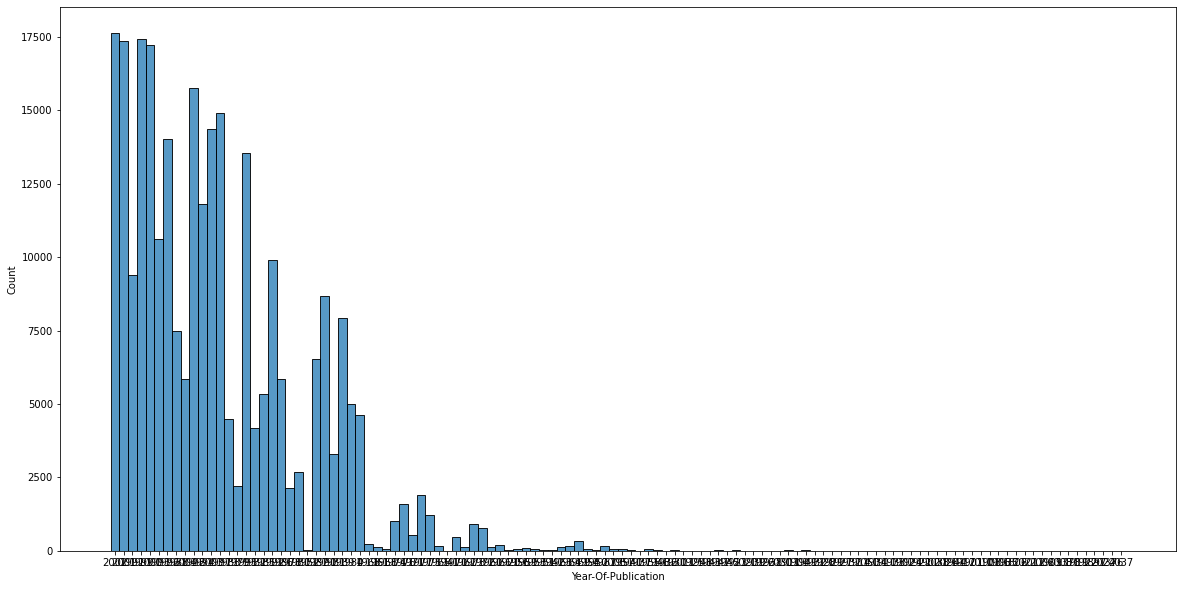

In [11]:
f, ax = plt.subplots(figsize=(20, 10))
sns.histplot(years, x='Year-Of-Publication')

In [12]:
years['Year-Of-Publication'].min()

'0'

In [13]:
years['Year-Of-Publication'].max()

'2050'

In [14]:
years[years['Year-Of-Publication'].apply(lambda x: int(x) == 0)].shape # 4618 books with Year-Of-Publication equal to 0

(4618, 8)

In [15]:
years[years['Year-Of-Publication'].apply(lambda x: int(x) < 1900 and int(x) != 0)] # year of publication equal to 0
# or less than 1900 does not make sense, because ISBN was introduced in 1966

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
171817,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
245607,0781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897,Reprint Services Corp,http://images.amazon.com/images/P/0781268001.0...,http://images.amazon.com/images/P/0781268001.0...,http://images.amazon.com/images/P/0781268001.0...
253750,964442011X,Tasht-i khun,Isma°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


In [16]:
years[years['Year-Of-Publication'].apply(lambda x: int(x) > 2005)] # these records should be mistakes, because
# dataset was created in 2004, and according to several of them it is true

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
12782,0380816792,A Rose in Winter,Kathleen E. Woodiwiss,2011,Harper Mass Market Paperbacks,http://images.amazon.com/images/P/0380816792.0...,http://images.amazon.com/images/P/0380816792.0...,http://images.amazon.com/images/P/0380816792.0...
30010,068160204X,The Royals,Kitty Kelley,2020,Bausch &amp; Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
92156,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020,Bausch &amp; Lombard,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das gro�?�?e B�?¶se- M�?¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...


# Ratings

In [17]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [19]:
ratings[ratings['ISBN'].apply(lambda x: not x.isascii() or not x.isprintable())]

,User-ID,ISBN,Book-Rating
58208,11676,8475560806�,6
124045,28537,349800924�,8
164558,36369,8475560806�,7
235644,54828,393�704064,10
252687,57850,225315398�,3
292012,69558,7544223434/I�,8
353525,85250,�423350229,0
357163,86103,�3499128624,8
358139,86219,349800924�,8
359006,86337,L�BBE01720/2,0


In [20]:
ratings['User-ID'].nunique()

105283

In [21]:
ratings['Book-Rating'].value_counts() # most of the users did not rate their books (0 is implicit rating)

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

# Users

In [22]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [24]:
users[users['Location'].apply(lambda x: not x.isascii() or not x.isprintable())]

,User-ID,Location,Age
42,43,"m�xico, m�xico city, distrito federal",NaN
170,171,"ita�, s�o paulo, brazil",29.0
181,182,"buitenpost, frysl�n, netherlands",36.0
250,251,"valladolid, castilla y le�n, spain",54.0
267,268,"�rhus, \n/a\"", denmark""",NaN
...,...,...,...
278746,278747,"sundsvall, v�sternorrland, sweden",20.0
278777,278778,"k�ln, nordrhein-westfalen, germany",42.0
278810,278811,"����, ����, china",19.0
278844,278845,"j�rvenp��, uusimaa, finland",NaN


In [25]:
users['Location'].nunique()

57309

In [26]:
users['Location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
bredbury, stockport, united kingdom                 1
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57309, dtype: int64